https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [1]:
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance

from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier for modeling

# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    classification_report,  # To generate a detailed classification report
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves
    
)


%matplotlib inline

In [2]:
# From kaggle dataset
#df= pd.read_csv('/kaggle/input/diabetes-binary-health-indicators-brfss2015/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df= pd.read_csv('datasets/diabetes_012_health_indicators_BRFSS2015.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## EXPLORATORY DATA ANALYSIS

In [34]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())
    print("\n7. Summary Statistics:\n", df.describe())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n8. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)


1. Dataset Dimensions: (229781, 22)

2. Column Names:
 ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity  

In [5]:
df.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
df.duplicated().sum()

23899

In [12]:
# df.T.duplicated().any()

In [13]:
# df.T.duplicated().sum()

In [14]:
df.drop_duplicates(inplace=True)

In [15]:

df.shape

(229781, 22)

In [16]:
df.duplicated().sum()

0

# DATA VISUALIZATION

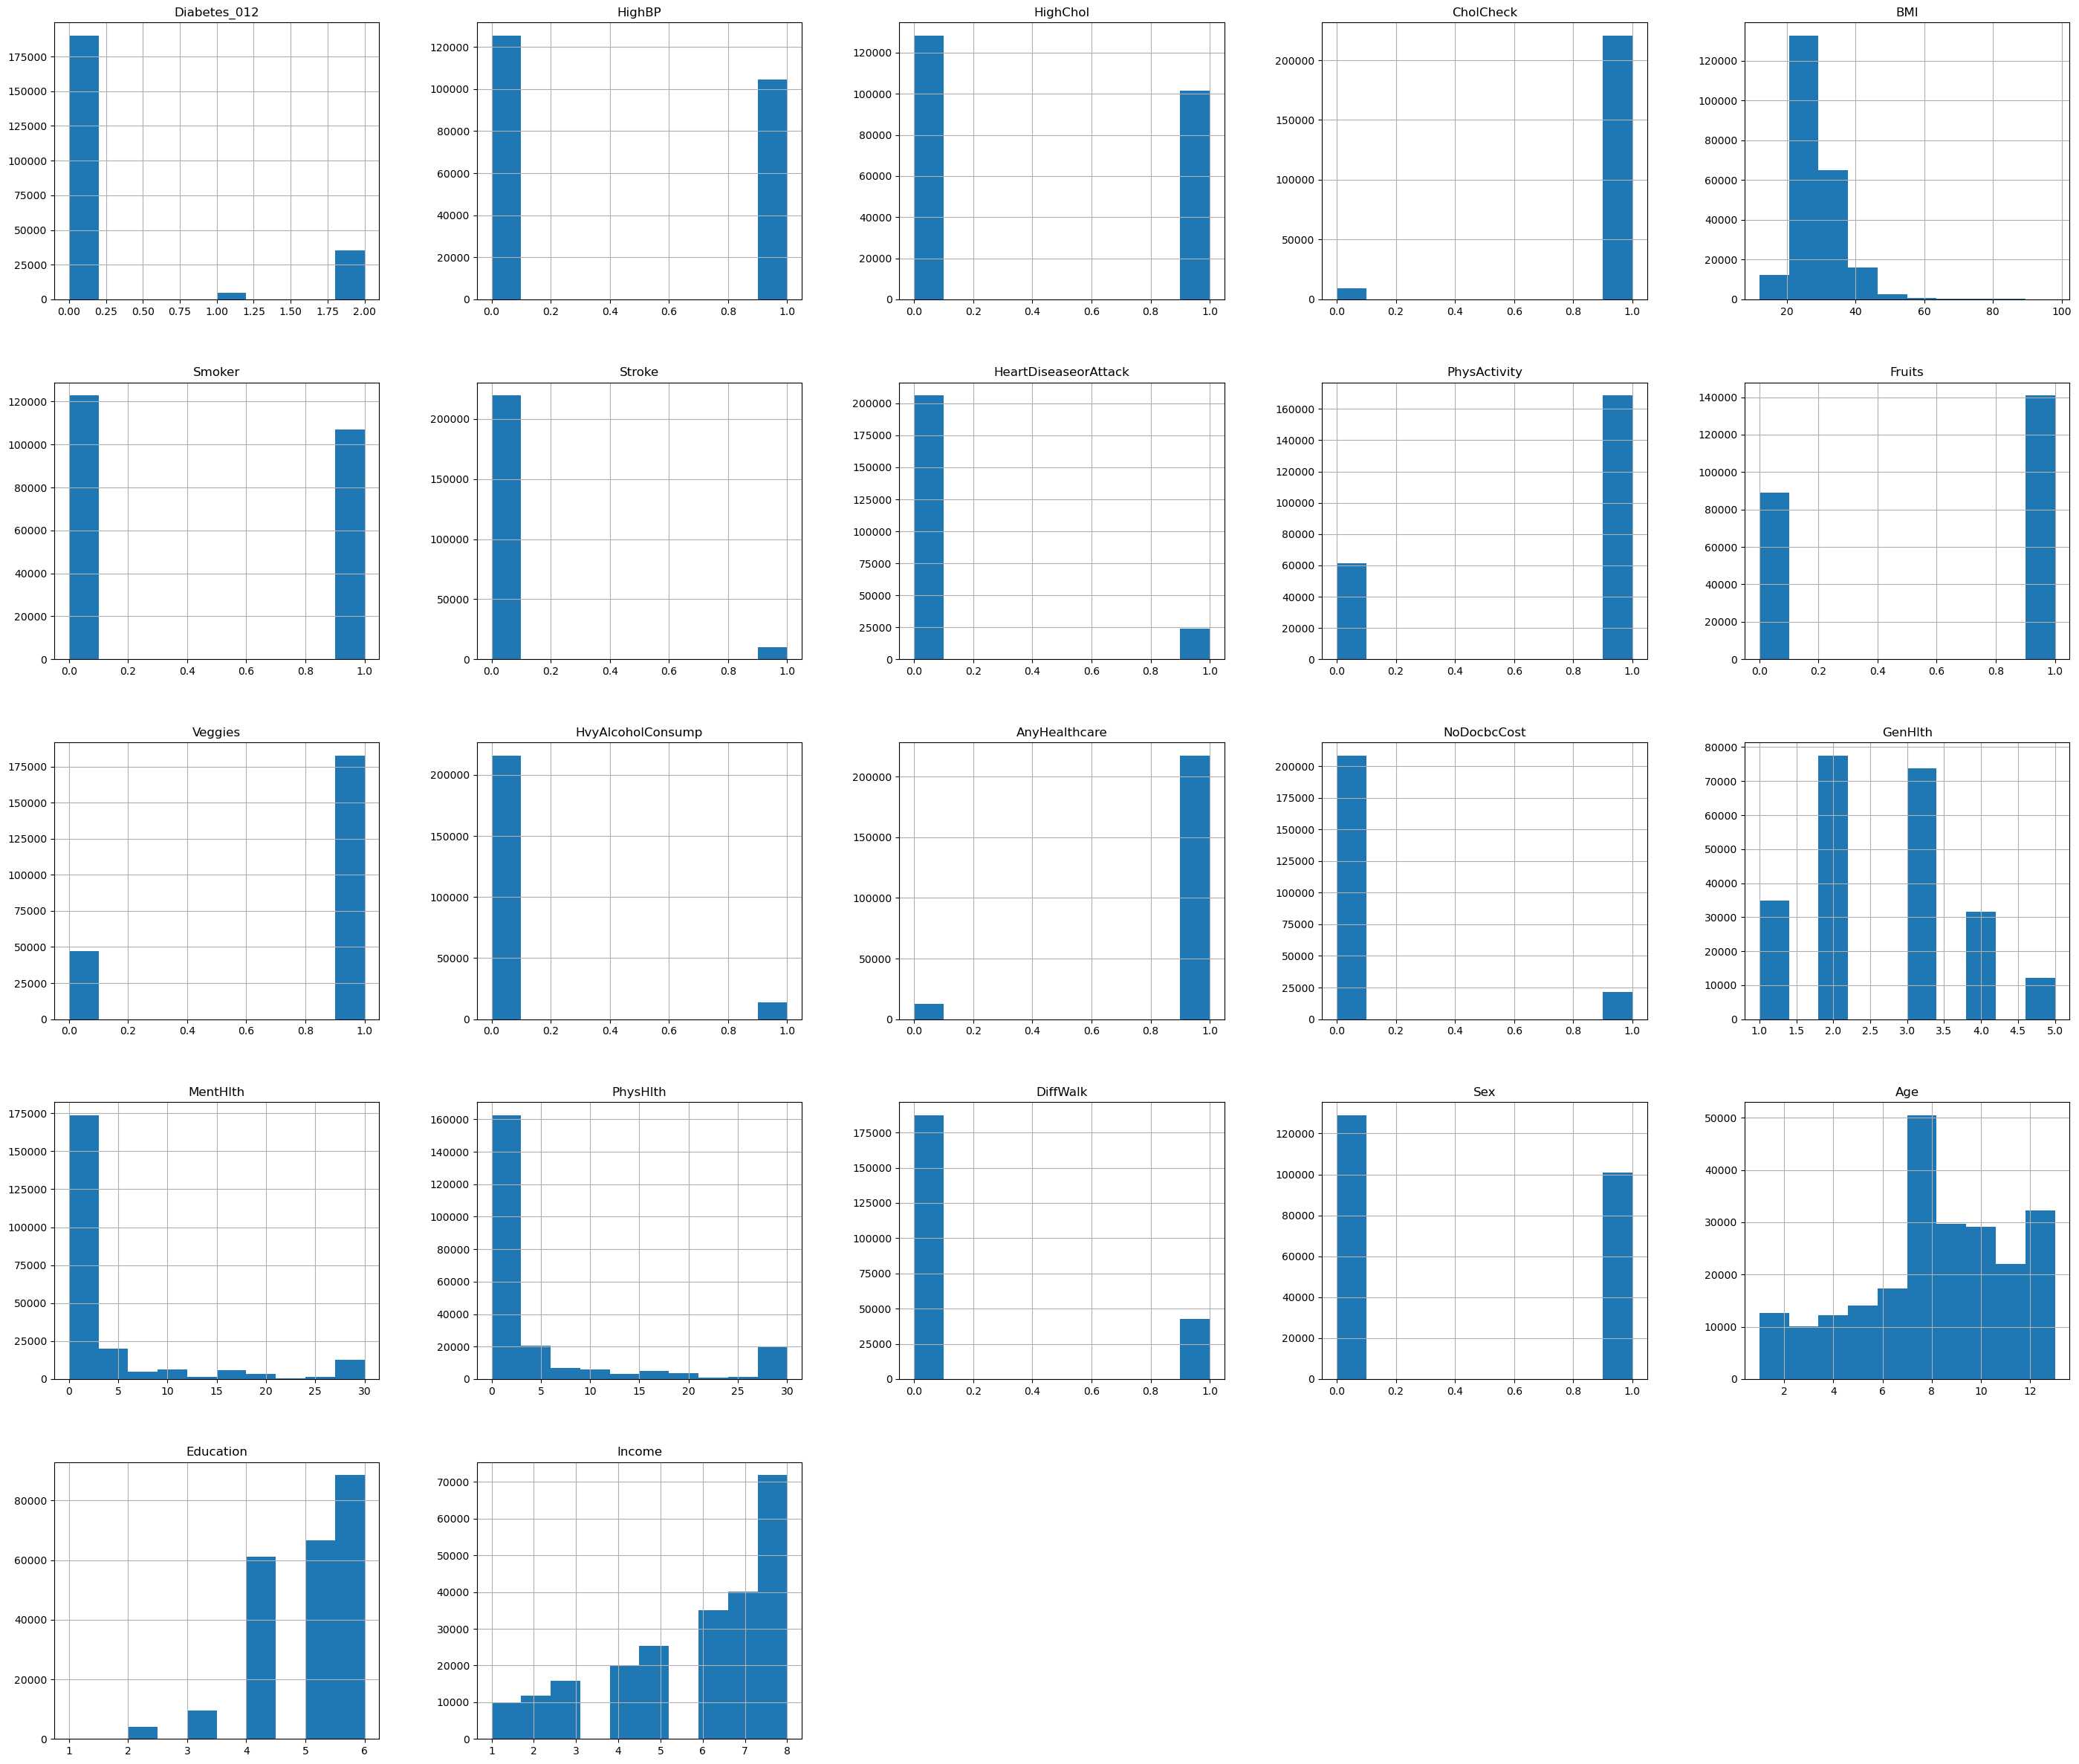

In [17]:
df.hist(figsize=(35,30));

In [18]:
df.Diabetes_012.value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

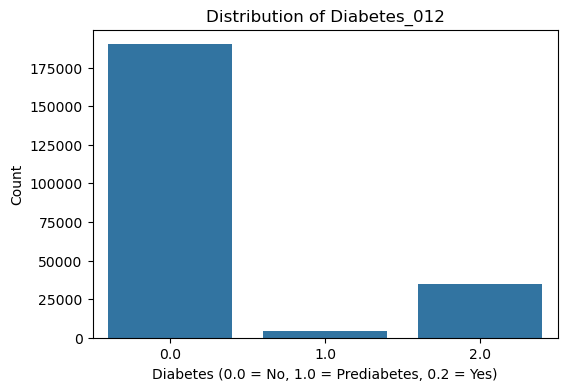

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes_012')
plt.xlabel('Diabetes (0.0 = No, 1.0 = Prediabetes, 0.2 = Yes)')
plt.ylabel('Count')
plt.show()

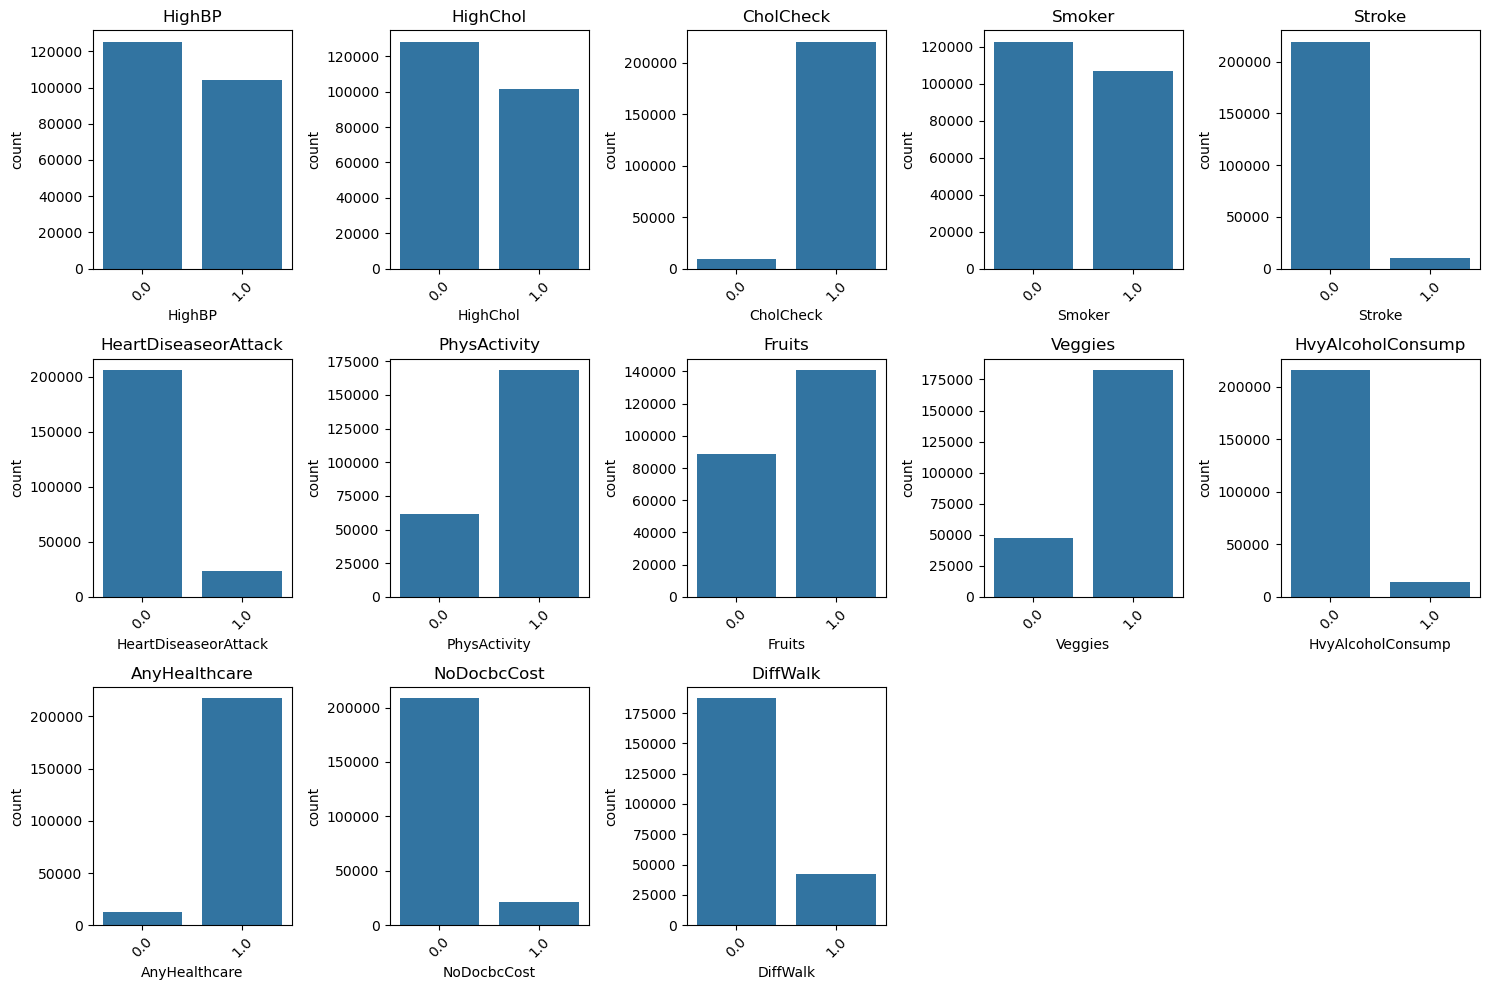

In [20]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

plt.figure(figsize=(15,10))
for i, feature in enumerate(binary_features):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


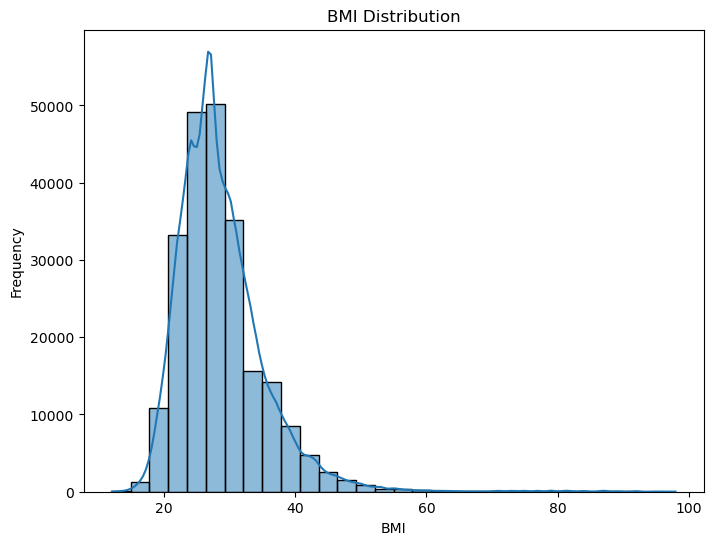

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


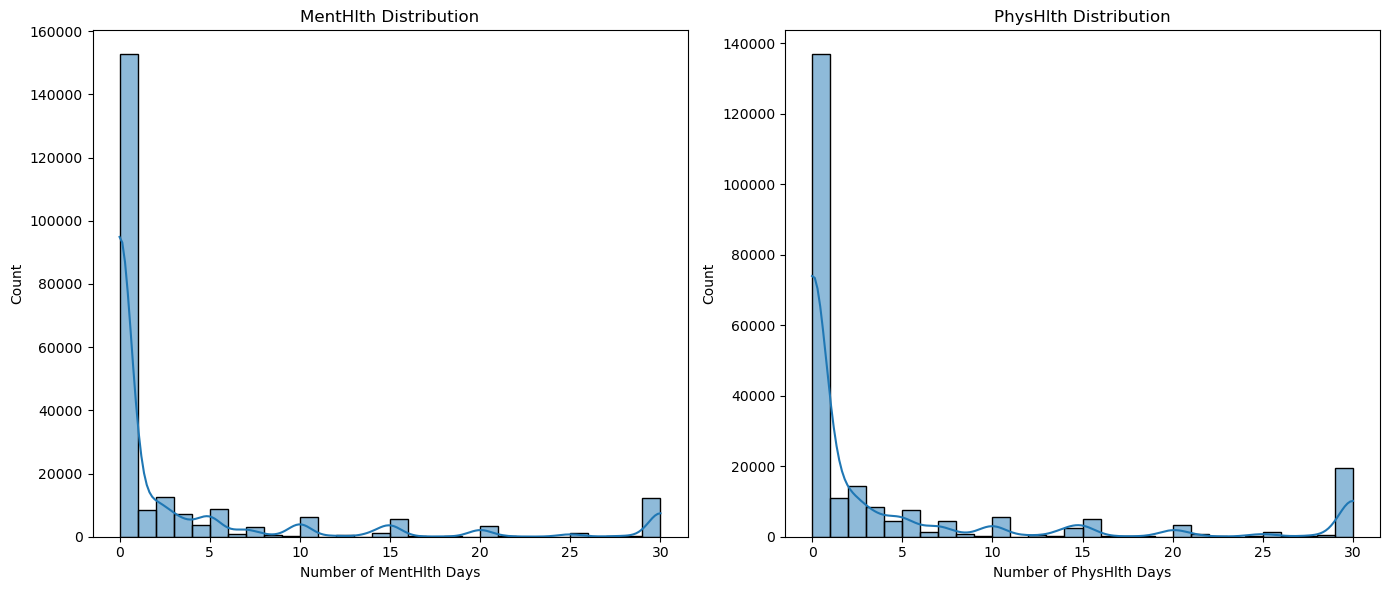

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(df['MentHlth'], kde=True, bins=30, ax=ax[0])
ax[0].set_title('MentHlth Distribution')
ax[0].set_xlabel('Number of MentHlth Days')

sns.histplot(df['PhysHlth'], kde=True, bins=30, ax=ax[1])
ax[1].set_title('PhysHlth Distribution')
ax[1].set_xlabel('Number of PhysHlth Days')

plt.tight_layout()
plt.show()

In [23]:
df.Sex.value_counts()

0.0    128854
1.0    100927
Name: Sex, dtype: int64

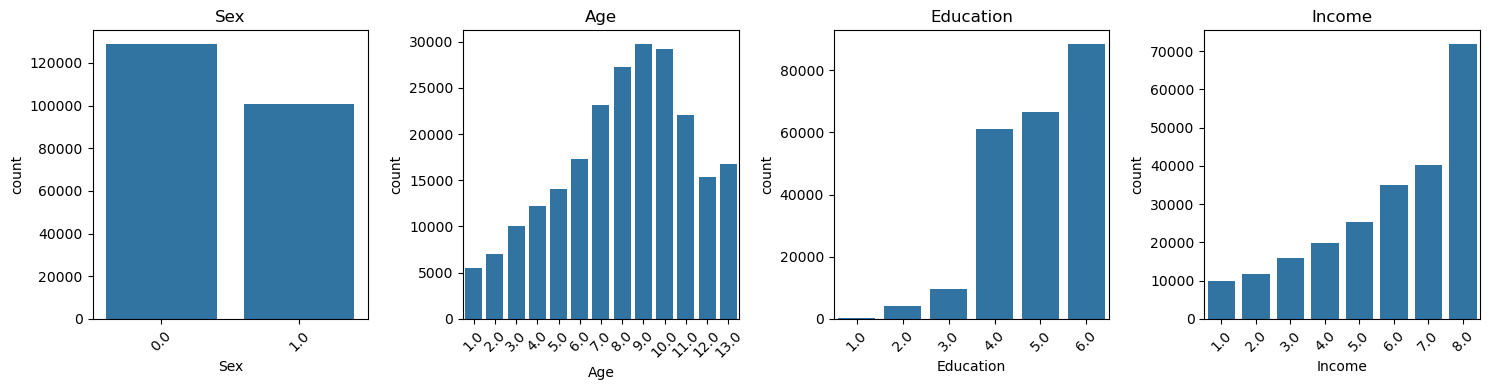

In [24]:
categorical_features = ['Sex', 'Age', 'Education', 'Income']
plt.figure(figsize=(15,4))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=feature, data=df, order=sorted(df[feature].unique()))
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


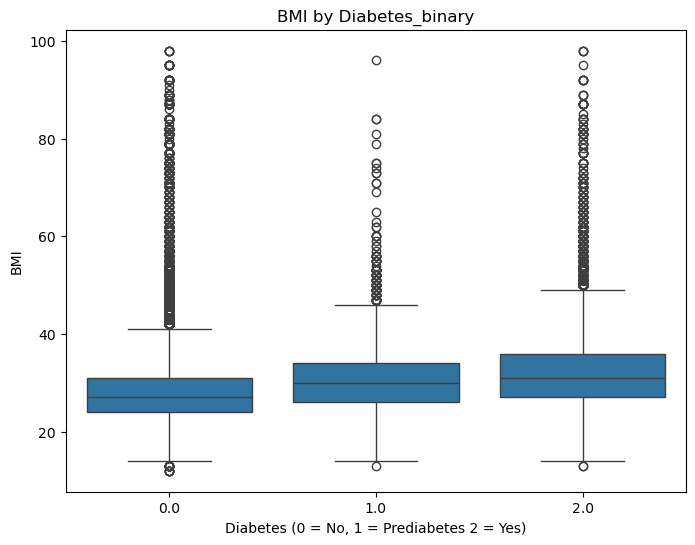

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI by Diabetes_binary')
plt.xlabel('Diabetes (0 = No, 1 = Prediabetes 2 = Yes)')
plt.ylabel('BMI')

plt.show()


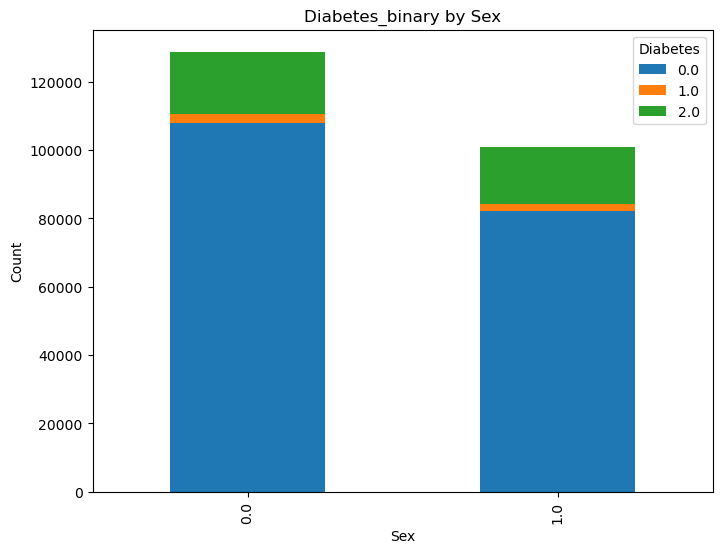

In [26]:
ct = pd.crosstab(df['Sex'], df['Diabetes_012'])
ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Diabetes_binary by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()


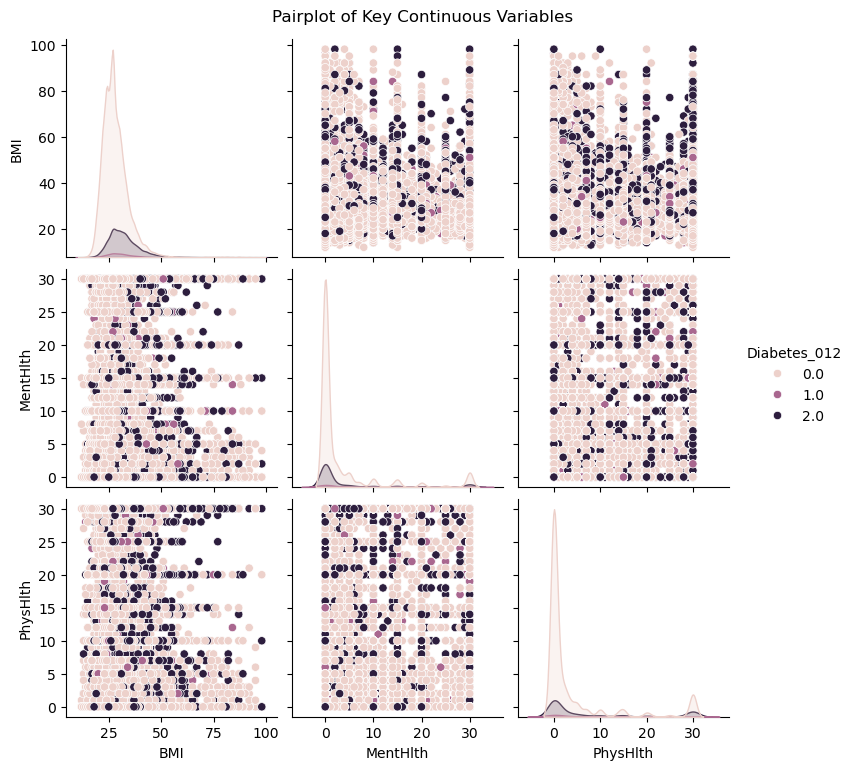

In [27]:
# sns.pairplot(df[['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_012']], hue='Diabetes_012')
# plt.suptitle('Pairplot of Key Continuous Variables', y=1.02)
# plt.show()


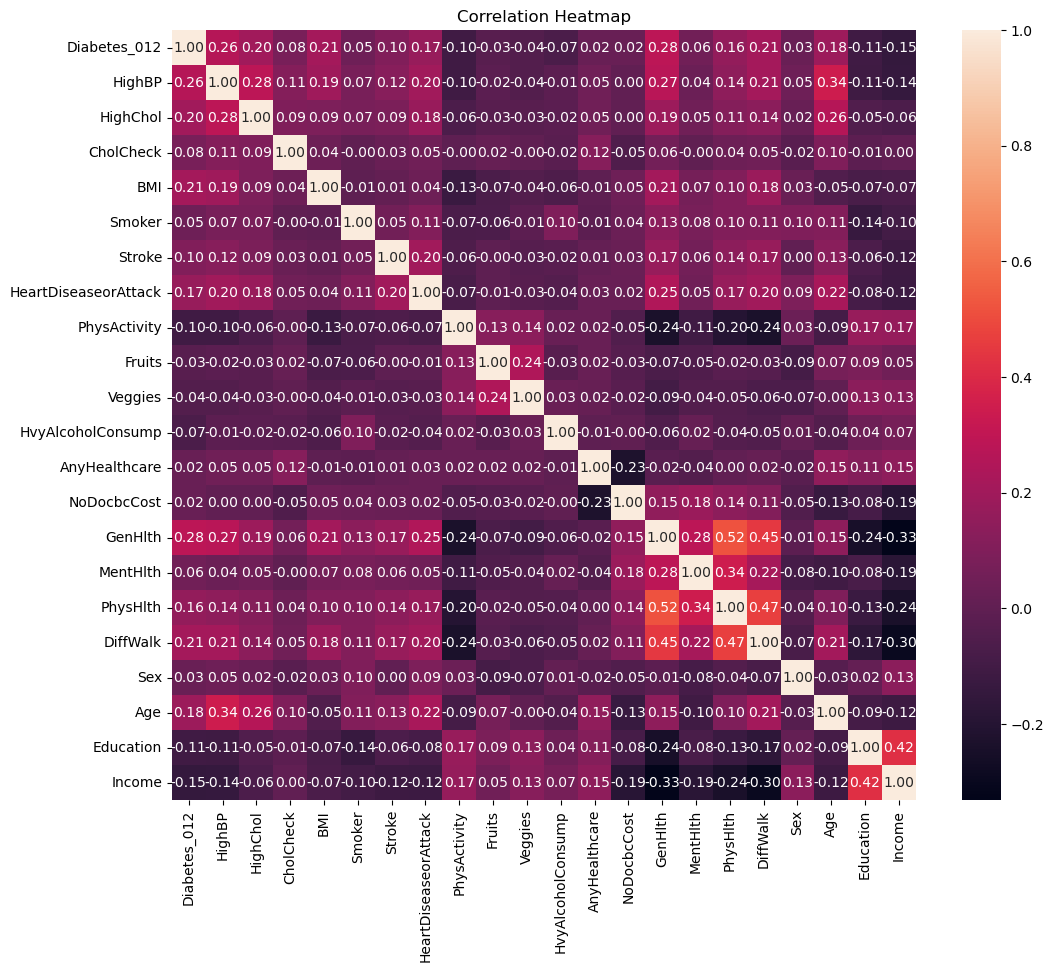

In [28]:
## Correlation matrix
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### Key Observations:
1. **Diabetes_binary and HighBP (Hypertension) (~0.25 correlation)**  
   - A moderate positive correlation suggests that people with high blood pressure have a higher likelihood of diabetes.
  
2. **Diabetes_binary and General Health (~0.28 correlation)**  
   - Poor general health is moderately associated with diabetes.
  
3. **HighBP and Age (~0.34 correlation)**  
   - As expected, older individuals tend to have higher blood pressure.
  
4. **HighBP and General Health (~0.27 correlation)**  
   - Poor general health is linked with higher blood pressure.
  
5. **General Health and Mental/Physical Health (~0.52, ~0.47 correlation respectively)**  
   - People reporting poor general health also report worse mental and physical health.
  
6. **Education and Income (~0.42 correlation)**  
   - Higher education is associated with higher income.

7. **Physical Activity and General Health (-0.24 correlation)**  
   - More physical activity is linked to better general health.

8. **Heavy Alcohol Consumption has weak correlations with most variables**  
   - This suggests it does not significantly impact most other health-related factors in this dataset.

# FEATURE SELECTION

I will consider how each individual features correlate with the target variable, their mutual information scores, and domain knowledge in season the features

In [29]:
# Removing Multicolinearity from the features if they exist

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(df,0.7)
corr_features

set()

In [30]:
# Removing highly correlated features if any exists
df = df.drop(columns=corr_features)

The is no multicolinearity among the features

### Description of each features

Medical Conditions/Metrics:
- Diabetes_012: Diabetes status (0: no diabetes, 1: prediabetes, 2: diabetes)
- HighBP: High blood pressure (yes/no)
- HighChol: High cholesterol (yes/no)
- CholCheck: Cholesterol check in past 5 years (yes/no)
- BMI: Body Mass Index
- Stroke: Ever had a stroke (yes/no)
- HeartDiseaseorAttack: History of heart disease/attack (yes/no)

Lifestyle Factors:
- Smoker: Have you smoked 100 cigarettes in your life? (yes/no)
- PhysActivity: Physical activity in past 30 days (yes/no)
- Fruits: Consume fruit 1+ times per day (yes/no)
- Veggies: Consume vegetables 1+ times per day (yes/no)
- HvyAlcoholConsump: Heavy alcohol consumption (yes/no)

Healthcare Access:
- AnyHealthcare: Have any healthcare coverage (yes/no)
- NoDocbcCost: Could not see doctor due to cost (yes/no)

Health Status:
- GenHlth: General health rating (1-5 scale, 1=excellent, 5=poor)
- MentHlth: Days of poor mental health in past 30 days (0-30)
- PhysHlth: Days of poor physical health in past 30 days (0-30)
- DiffWalk: Difficulty walking/climbing stairs (yes/no)

Demographics:
- Sex: Gender
- Age: Age group (categorical)
- Education: Education level
- Income: Income level


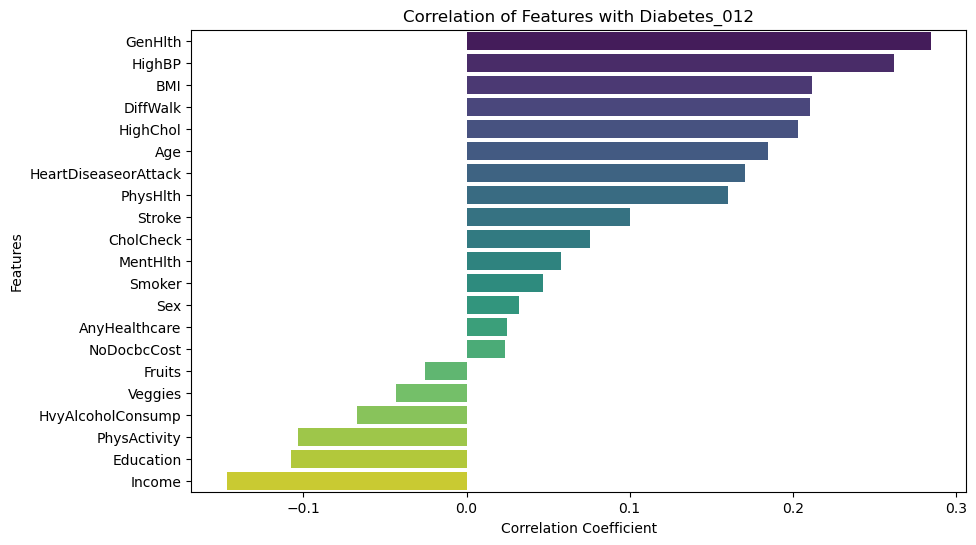

In [31]:
# Compute correlation matrix and select correlation with 'Diabetes_012'
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012')
correlations = correlations.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Diabetes_012')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Based on the coreletion relationship with the target GenHlth, HighBP, BMI, DiffWalk,  HighChol, Age,
HeartDiseaseorAttack, PhysHlth, Stroke, CholCheck, MentHlth, Smoker, Sex.

I would also pick HvyAlcoholConsump, PhysActivity, Education, Income because their negative correlation.


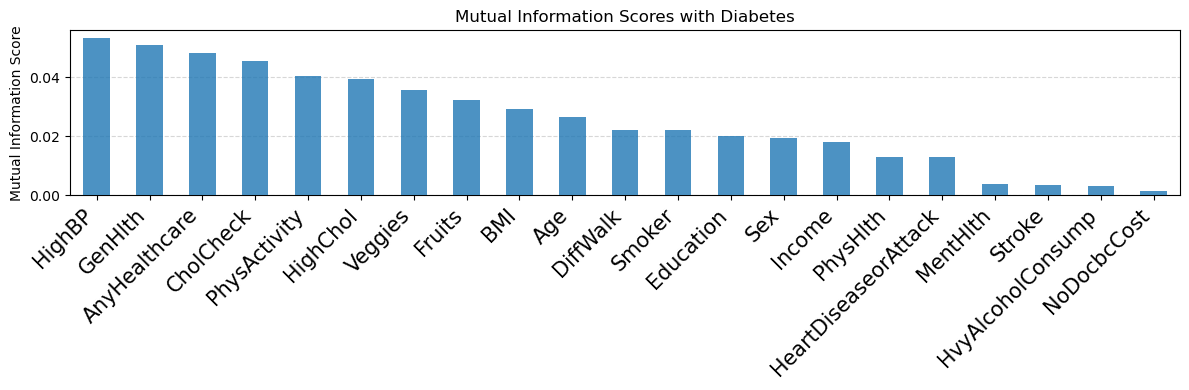


Mutual Information Scores:
HighBP                  0.053174
GenHlth                 0.050753
AnyHealthcare           0.048036
CholCheck               0.045617
PhysActivity            0.040376
HighChol                0.039223
Veggies                 0.035515
Fruits                  0.032130
BMI                     0.029246
Age                     0.026447
DiffWalk                0.022251
Smoker                  0.022080
Education               0.020078
Sex                     0.019433
Income                  0.018109
PhysHlth                0.013141
HeartDiseaseorAttack    0.012900
MentHlth                0.003748
Stroke                  0.003542
HvyAlcoholConsump       0.003343
NoDocbcCost             0.001646
dtype: float64


In [32]:
# Calculate mutual information scores

X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']  # Target

mi_scores = mutual_info_classif(X, y)

# Create a Series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 4))
mi_series.plot(kind='bar', alpha=0.8, zorder=3)
plt.title("Mutual Information Scores with Diabetes")
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation=45, ha='right', size=15)
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print the scores
print("\nMutual Information Scores:")
print(mi_series)

Based on the Mutual information score with the target HighBP, GenHlth, AnyHealthcare, CholCheck, PhysActivity, HighChol, Fruits, Veggies, BMI, Age, Smoker, DiffWalk, Sex.


Based on the coreletion relationship with the target GenHlth, HighBP, BMI, DiffWalk,  HighChol, Age,
HeartDiseaseorAttack, PhysHlth, Stroke, CholCheck, MentHlth, Smoker, Sex.

I would also pick HvyAlcoholConsump, PhysActivity, Education, Income because their negative correlation.

In [33]:
# Features selected by both methods

feature_correlation = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age',
         'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'CholCheck', 'MentHlth', 
         'Smoker', 'Sex', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']

mutual_information = ['HighBP', 'GenHlth', 'AnyHealthcare', 'CholCheck', 'PhysActivity', 
         'HighChol', 'Fruits', 'Veggies', 'BMI', 'Age', 'Smoker', 'DiffWalk', 'Sex']



# Combine lists and remove duplicates using set
combined_set = set(feature_correlation + mutual_information)

# Convert back to list for ordered representation
combined_features = list(combined_set)

print("Combined unique features as a list:")
print(combined_features)
print("\nNumber of unique features:", len(combined_features))
print("\nCombined unique features as a set:")
print(combined_set)
print("\nNumber of unique features:", len(combined_set))

Combined unique features as a list:
['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 'Veggies', 'Education', 'Age', 'HighBP', 'Fruits']

Number of unique features: 20

Combined unique features as a set:
{'PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'}

Number of unique features: 20


In [35]:
# Making Final Feature Selection With Domain Knowledge
selected_features = ['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 
                     'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 
                     'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 
                     'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_012']

In [37]:
df = df[selected_features]

In [38]:
df.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_012'],
      dtype='object')

'Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'

# PREPROCESSING

In [39]:
# Separating features (X) and target (y) for 

X = df.drop("Diabetes_012",axis=1)
y = df["Diabetes_012"]

In [41]:
"""Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, stratify=df['Diabetes_012'], random_state=42 )

# """Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# # Splitting the data into training and testing datasets
# = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [42]:
y_train.value_counts()

0.0    152043
2.0     28078
1.0      3703
Name: Diabetes_012, dtype: int64

In [43]:
type(y_train)

pandas.core.series.Series

In [44]:
# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling Completed!")

Scaling Completed!


In [45]:
feature_names = X_train.columns

In [46]:
# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with column names

In [47]:
X_train.head()

,PhysHlth,HvyAlcoholConsump,Smoker,CholCheck,Stroke,GenHlth,MentHlth,Sex,Income,BMI,PhysActivity,HeartDiseaseorAttack,AnyHealthcare,DiffWalk,HighChol,Veggies,Education,Age,HighBP,Fruits
0,-0.517652,-0.254729,-0.935491,0.204154,-0.215735,-0.565279,1.493485,-0.883907,-0.423941,-0.544727,-1.657108,-0.339561,0.238327,-0.478110,-0.890713,0.507835,0.022133,0.617400,-0.914561,0.794631
1,-0.407155,-0.254729,-0.935491,0.204154,-0.215735,-0.565279,-0.454160,-0.883907,0.531313,-1.135370,-1.657108,-0.339561,0.238327,-0.478110,-0.890713,0.507835,1.029200,-1.321368,-0.914561,0.794631
2,-0.517652,-0.254729,-0.935491,0.204154,-0.215735,0.374156,-0.454160,1.131340,1.008939,0.488897,0.603461,-0.339561,0.238327,-0.478110,-0.890713,0.507835,1.029200,-1.644496,1.093421,0.794631
3,-0.517652,-0.254729,1.068958,0.204154,-0.215735,0.374156,-0.454160,-0.883907,0.053686,0.488897,-1.657108,-0.339561,0.238327,-0.478110,1.122696,0.507835,0.022133,1.263655,1.093421,0.794631
4,2.797269,-0.254729,1.068958,0.204154,-0.215735,1.313592,3.441131,1.131340,-2.334448,-0.544727,-1.657108,2.944981,0.238327,2.091568,-0.890713,0.507835,-0.984934,1.586783,1.093421,0.794631


In [48]:
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 152043, 2.0: 28078, 1.0: 3703})
Class distribution after SMOTE: Counter({0.0: 152043, 2.0: 152043, 1.0: 152043})


In [49]:
len(X_train_balanced)

456129

# MODELLING AND PREDICTIONS

In [50]:

lr = LogisticRegression( random_state=42)

lr.fit(X_train_balanced, y_train_balanced)
y_pred = lr.predict(X_test)


In [51]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    percent = cm / cm.sum() * 100
    
    annotations = np.array([[f"{label}\n{val}\n({p:.1f}%)" 
                            for label, val, p in zip(row, vals, prow)] 
                          for row, vals, prow in zip(labels, cm, percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [52]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred))

print()
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

Accuracy: 0.63
Weighted Precision: 0.84
Weighted Recall: 0.63
Weighted F1 Score: 0.70

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     38012
         1.0       0.03      0.30      0.06       926
         2.0       0.37      0.59      0.45      7019

    accuracy                           0.63     45957
   macro avg       0.45      0.51      0.42     45957
weighted avg       0.84      0.63      0.70     45957


[[24430  6941  6641]
 [  269   278   379]
 [ 1208  1701  4110]]


ValueError: `data` and `annot` must have same shape.

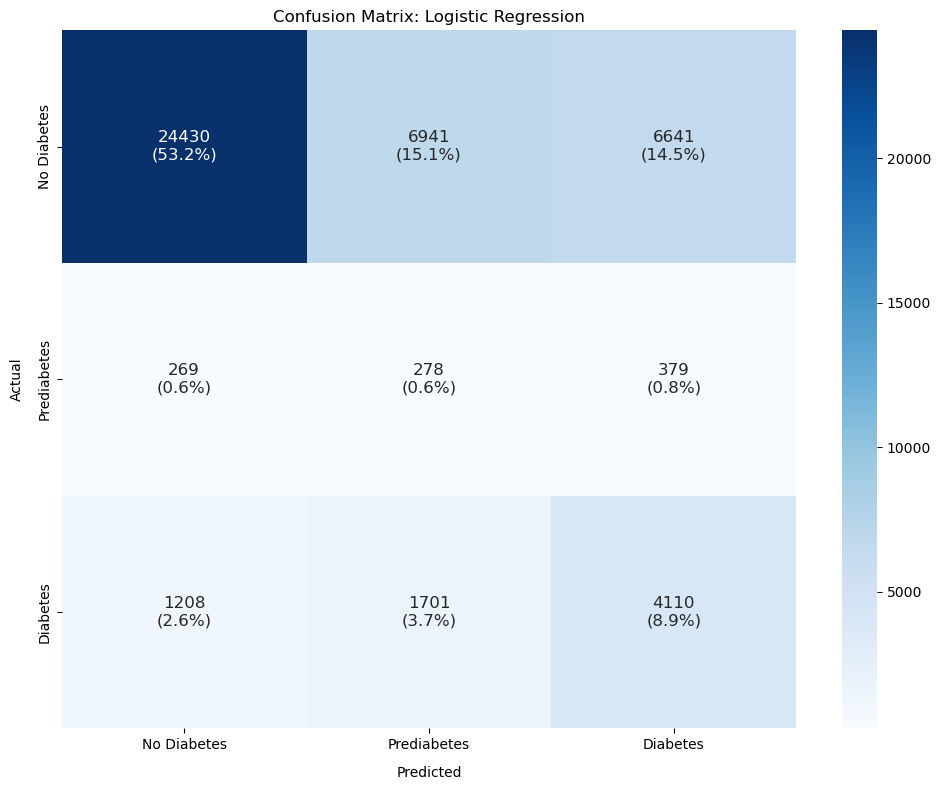

In [66]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    plt.figure(figsize=(10, 8))
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    percent = cm / cm.sum() * 100
    
    # Create simplified annotations
    annotations = []
    for i in range(len(cm)):
        row_annotations = []
        for j in range(len(cm)):
            value = cm[i, j]
            percentage = percent[i, j]
            # Simplified annotation format
            annotation = f"{value}\n({percentage:.1f}%)"
            row_annotations.append(annotation)
        annotations.append(row_annotations)
    
    # Create heatmap with more space
    sns.heatmap(cm, 
                annot=np.array(annotations), 
                fmt='',
                cmap='Blues',
                xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                annot_kws={'size': 12})
    
#     plt.title("Confusion Matrix: Diabetes Classification", pad=20)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted', labelpad=10)
    plt.ylabel('Actual', labelpad=10)
    
    # Add more padding to prevent cutoff
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
rf_ypred  = rf.predict(X_test)

In [54]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, rf_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, rf_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, rf_ypred))

print()
print(confusion_matrix(y_test, rf_ypred))
plot_confusion_matrix(y_test, rf_ypred, "Random Forest Classifier")

Accuracy: 0.76
Weighted Precision: 0.81
Weighted Recall: 0.76
Weighted F1 Score: 0.78

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86     38012
         1.0       0.03      0.03      0.03       926
         2.0       0.38      0.60      0.46      7019

    accuracy                           0.76     45957
   macro avg       0.44      0.48      0.45     45957
weighted avg       0.81      0.76      0.78     45957


[[30817   619  6576]
 [  494    28   404]
 [ 2627   181  4211]]


ValueError: `data` and `annot` must have same shape.

In [55]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train_balanced, y_train_balanced)
xgb_ypred = xgboost.predict(X_test)

In [56]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, xgb_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, xgb_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, xgb_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, xgb_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, xgb_ypred))

print()
print(confusion_matrix(y_test, xgb_ypred))
plot_confusion_matrix(y_test, xgb_ypred, "XGBClassifier")

Accuracy: 0.84
Weighted Precision: 0.79
Weighted Recall: 0.84
Weighted F1 Score: 0.80

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.24      0.34      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.40      0.41     45957
weighted avg       0.79      0.84      0.80     45957


[[36661     1  1350]
 [  814     0   112]
 [ 5300     0  1719]]


ValueError: `data` and `annot` must have same shape.

# HYPERPARAMETER TUNING AND CROSS-VALIDATION

In [57]:

# Logistic Regression hyperparameters
param_distributions_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}


# Number of parameter settings that are sampled

n_iter_search = 20

# Number of cross-validation folds
cv = 5



In [58]:

# Setuping RandomizedSearchCV

# Logistic Regression
lr = LogisticRegression()
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_distributions_lr,
    n_iter=n_iter_search,
    cv=cv,
    random_state=42,
    n_jobs=-1
)
random_search_lr.fit(X_train_balanced, y_train_balanced)
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)
print("Best Logistic Regression CV Score:", random_search_lr.best_score_)


Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0006951927961775605}
Best Logistic Regression CV Score: 0.5133350472693954


In [59]:

# Evaluate the best model on the test set

best_lr = random_search_lr.best_estimator_



y_pred_lr = best_lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_lr))

print()
print(confusion_matrix(y_test,y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Best Parameters")


Accuracy: 0.65
Weighted Precision: 0.83
Weighted Recall: 0.65
Weighted F1 Score: 0.72

              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.23      0.06       926
         2.0       0.36      0.62      0.46      7019

    accuracy                           0.65     45957
   macro avg       0.44      0.51      0.43     45957
weighted avg       0.83      0.65      0.72     45957


[[25426  5325  7261]
 [  297   217   412]
 [ 1391  1272  4356]]


ValueError: `data` and `annot` must have same shape.

In [38]:
# Saving The Models
import os
import pickle

# Creating a folder to save the best models if it doesn't exist
save_folder = "saved_models"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Saving the best models using pickle
with open(os.path.join(save_folder, "best_logistic_regression.pkl"), "wb") as file:
    pickle.dump(best_lr, file)


print(f"Model saved successfully in the '{save_folder}' folder.\n")

Model saved successfully in the 'saved_models' folder.

